## Assignment 2 (70 marks)
#### =====================================================================================================
### Deadline: 10/11 11:59 pm
#### =====================================================================================================

### Problem 1: Classification (35 marks)

`lab02_dataset_1.xlsx` contains 10,302 observations on various vehicles. You will use the observations in this dataset to train models that predict the usage of a vehicle. The input features which will be used for your training are *AGE, TRAVTIME, CAR_TYPE, OCCUPATION, EDUCATION* and your output label is the binary class *CAR_USE*, whose values are *Private* and *Commercial*.

### 1.a (2 marks)
For the 5 input features, drop any rows with missing values. Output the new length of the training dataset after you drop the missing values among the input features.

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pprint

In [44]:
data = pd.read_excel('lab02_dataset_1.xlsx', engine='openpyxl')
print(data.shape)
featurelabels = ['AGE', 'TRAVTIME', 'CAR_TYPE', 'OCCUPATION', 'EDUCATION']
outpuLabel = ['CAR_USE']
data.head()

(10302, 26)


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,CAR_TYPE,RED_CAR,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,CLM_AMT,CLM_COUNT,EXPOSURE
0,63581743,0,1939-03-16,60.0,0,11.0,67000.0,No,NaN,No,...,11,Minivan,yes,No,3,18.0,Highly Urban/ Urban,0,0,0.189
1,132761049,0,1956-01-21,43.0,0,11.0,91000.0,No,257000.0,No,...,1,Minivan,yes,No,0,1.0,Highly Urban/ Urban,0,0,1.000
2,921317019,0,1951-11-18,48.0,0,11.0,53000.0,No,NaN,No,...,1,Van,yes,No,2,10.0,Highly Urban/ Urban,0,0,1.000
3,727598473,0,1964-03-05,35.0,1,10.0,16000.0,No,124000.0,Yes,...,4,SUV,no,No,3,10.0,Highly Urban/ Urban,0,0,0.828
4,450221861,0,1948-06-05,51.0,0,14.0,NaN,No,306000.0,Yes,...,7,Minivan,yes,No,0,6.0,Highly Urban/ Urban,0,0,0.729


In [45]:
print(data[featurelabels].isna().any())
print()
print(data[outpuLabel].isna().any())

AGE            True
TRAVTIME      False
CAR_TYPE      False
OCCUPATION    False
EDUCATION     False
dtype: bool

CAR_USE    False
dtype: bool


In [46]:
print(data[featurelabels].isnull().any())
print()
print(data[outpuLabel].isnull().any())

AGE            True
TRAVTIME      False
CAR_TYPE      False
OCCUPATION    False
EDUCATION     False
dtype: bool

CAR_USE    False
dtype: bool


In [47]:
data.dropna(subset = ['AGE', 'TRAVTIME', 'CAR_TYPE', 'OCCUPATION', 'EDUCATION'], how='any', inplace=True)
print("The shape of the data is :", data.shape)
data[featurelabels+outpuLabel].head()

The shape of the data is : (10295, 26)


,AGE,TRAVTIME,CAR_TYPE,OCCUPATION,EDUCATION,CAR_USE
0,60.0,14,Minivan,Professional,PhD,Private
1,43.0,22,Minivan,Blue Collar,High School,Commercial
2,48.0,26,Van,Manager,Bachelors,Private
3,35.0,5,SUV,Clerical,High School,Private
4,51.0,32,Minivan,Blue Collar,Below High Sc,Private


### 1.b (6 marks)
We want to encode categorical features as an integer array. Look up which sklearn function will allow you to do that and apply that on the input features. Also, remember to standardize your encoded features using `fit_transform` to create your final dataset. Finally, perform a 80-20 split on your dataset (80% for training, 20% for testing).

In [48]:
categoricalFeatures = ['CAR_TYPE', 'OCCUPATION', 'EDUCATION', 'CAR_USE']
numericfeatures = ['AGE', 'TRAVTIME']
outputFeature = 'CAR_USE'
featureDict = {}

for feature in categoricalFeatures:
    encoder = OrdinalEncoder()
    data[feature] = encoder.fit_transform(data[[feature]])

    labelMapping = encoder.categories_
    labelDict = {}

    for i, label in enumerate(labelMapping[0]):
        labelDict[label] = i

    featureDict[feature] = labelDict

pprint.pprint(featureDict)

X = data[featurelabels]
Y = data[outpuLabel]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state=42)

{'CAR_TYPE': {'Minivan': 0,
              'Panel Truck': 1,
              'Pickup': 2,
              'SUV': 3,
              'Sports Car': 4,
              'Van': 5},
 'CAR_USE': {'Commercial': 0, 'Private': 1},
 'EDUCATION': {'Bachelors': 0,
               'Below High Sc': 1,
               'High School': 2,
               'Masters': 3,
               'PhD': 4},
 'OCCUPATION': {'Blue Collar': 0,
                'Clerical': 1,
                'Doctor': 2,
                'Home Maker': 3,
                'Lawyer': 4,
                'Manager': 5,
                'Professional': 6,
                'Student': 7,
                'Unknown': 8}}


In [49]:
X_Test.head()

,AGE,TRAVTIME,CAR_TYPE,OCCUPATION,EDUCATION
3324,29.0,31,2.0,1.0,0.0
5849,50.0,46,5.0,6.0,0.0
4203,48.0,60,0.0,6.0,3.0
485,55.0,49,0.0,0.0,2.0
2795,47.0,18,0.0,7.0,2.0


### 1.c (6 marks)

i. Train a logistic regression model using `LogisticRegression`.

ii. Train a naive bayes model using `CategoricalNB` with a laplace smoothing of 0.5.

In [50]:
logisticRegresson = LogisticRegression()
logisticRegresson.fit(X_Train, Y_Train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [51]:
categoricalNB = CategoricalNB(alpha = 0.5)
categoricalNB.fit(X_Train, Y_Train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=0.5)

### 1.d (6 marks)
Compute and output the `accuracy_score` for both the classification models you learned on the testing partition.

In [52]:
y_pred_LR = logisticRegresson.predict(X_Test)
print(y_pred_LR)

y_pred_NB = categoricalNB.predict(X_Test)
print(y_pred_NB)

print("The accuracy score from Linear Regression is :", accuracy_score(Y_Test, y_pred_LR))
print("The accuracy score from categorial NB is :",accuracy_score(Y_Test, y_pred_NB))

[1. 1. 1. ... 1. 1. 1.]
[1. 0. 1. ... 1. 0. 0.]
The accuracy score from Linear Regression is : 0.6323457989315202
The accuracy score from categorial NB is : 0.8659543467702768


### 1.e (6 marks)

Let us study a few fictitious persons (test cases). Use the `CategoricalNB` model for this task.

Person 1, whose age is 45, has a travel time of 46, works in a Manager occupation, has an education level of Masters, and owns a Minivan.

Person 2, whose age is 51, has a travel time of 32, works in a Clerical occupation, has an education level of Below High Sc, and owns a Pickup.

Person 3, whose age is 25, has a travel time of 14, works in a Blue Collar occupation, has an education level of High School, and owns a SUV.

Display a datraframe that captures all the above information, alongwith two additional columns which will display the Car Use probabilities of these three people.

In [53]:
categoricalFeatures = ['CAR_TYPE', 'OCCUPATION', 'EDUCATION', 'CAR_USE']
numericfeatures = ['AGE', 'TRAVTIME']

AGE = [45, 51, 25]
TRAVTIME = [46, 32, 14]
OCCUPATION = [featureDict['OCCUPATION']['Manager'] , featureDict['OCCUPATION']['Clerical'], featureDict['OCCUPATION']['Blue Collar']]
EDUCATION = [featureDict['EDUCATION']['Masters'], featureDict['EDUCATION']['Below High Sc'], featureDict['EDUCATION']['High School']]
CAR_TYPE = [featureDict['CAR_TYPE']['Minivan'], featureDict['CAR_TYPE']['Pickup'], featureDict['CAR_TYPE']['SUV']]

testDF =  pd.DataFrame(
    {
        'AGE' : [45, 51, 25],
        'TRAVTIME' : [46, 32, 14],
        'CAR_TYPE': CAR_TYPE,
        'OCCUPATION': OCCUPATION,
        'EDUCATION': EDUCATION
    }
)

testDF.head()

predictProba = categoricalNB.predict_proba(testDF)
print(predictProba)
print(featureDict['CAR_USE'])

testDF['Commercial'] = list(predictProba[:, 0])
testDF['Private'] = np.array(predictProba[:, 1])

testDF.head()

[[0.06074965 0.93925035]
 [0.22063204 0.77936796]
 [0.62351972 0.37648028]]
{'Commercial': 0, 'Private': 1}


,AGE,TRAVTIME,CAR_TYPE,OCCUPATION,EDUCATION,Commercial,Private
0,45,46,0,5,3,0.060750,0.939250
1,51,32,2,1,1,0.220632,0.779368
2,25,14,3,0,2,0.623520,0.376480


### 1.f (5 marks)
Generate a histogram of the predicted probabilities of *CAR_USE = Private* using the `CategoricalNB` model.  The bin width is 0.05.  The vertical axis is the proportion of all the observations.

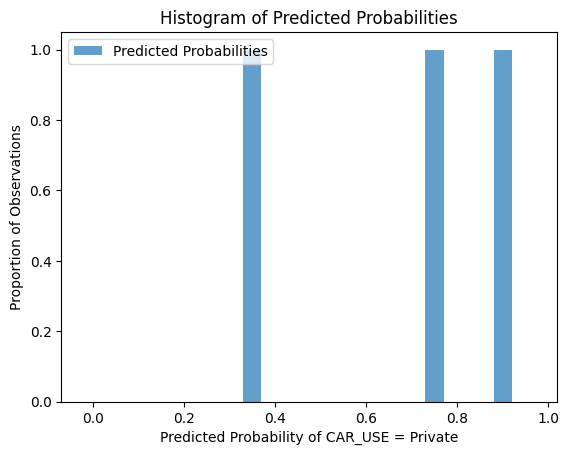

In [54]:
plt.hist(testDF['Private'], bins=np.arange(0, 1.05, 0.05), align='left', rwidth=0.8, alpha=0.7, label='Predicted Probabilities')
plt.xlabel('Predicted Probability of CAR_USE = Private')
plt.ylabel('Proportion of Observations')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

### 1.g (4 marks)
Using a classification threshold of 0.6 i.e., the class with a probability >= 0.6 is the correct output, what is the misclassification rate (computed on all the observations) of the `CategoricalNB` model?

In [55]:
predictedProba = categoricalNB.predict_proba(X_Test)
predictions = []
for i in predictedProba:
  if max(i) >= 0.6:
    predictions.append(i.argmax())
  else:
    predictions.append(-1)
print(predictions)

correctPredictions = [1 if pred == trues else 0 for pred, trues in zip(predictions, Y_Test['CAR_USE'])]
print(correctPredictions)

misClassificationRate = 1-(sum(correctPredictions) / len(Y_Test))
print(misClassificationRate)

[-1, -1, 1, 0, -1, 1, -1, 1, -1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, -1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 0, -1, 1, 0, -1, 1, 1, 1, 1, 1, 1, 0, 1, 0, -1, 0, 1, -1, 0, -1, 0, 0, 1, 1, 0, 1, 0, -1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 1, -1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, -1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, -1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, -1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, -1, 1, 1, 1, 1, -1, 1, 0, -1, 1, 0, 0, 1, 0, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 0, 1, 0, 0, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 0, 0, 1, 1, 1, 1, -1, 0, 0, 1, 1, 0, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, -1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1

### Problem 2: Linear Regression (20 marks)

`lab02_dataset_2.csv` contains 238 observations on customer purchase history. You will use the observations in this dataset to train models that predict the loyalty score of a customer. The input features which will be used for your training are *age, annual_income, purchase_amount, purchase_frequency* and your output label is *loyalty_score*.

### 2.a (2 marks)
Use the `MinMaxScaler` to transform the input features. Then apply a train-test split of 80-20 to generate the training and testing sets.

In [56]:
data = pd.read_csv('lab02_dataset_2.csv')
data.shape
data.head()

inputFeatures = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
outputfeatures = ['loyalty_score']

X = data[inputFeatures]
Y = data[outputfeatures]

minMax = MinMaxScaler()
X = pd.DataFrame(minMax.fit_transform(X), columns=inputFeatures)
X.head()

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2)
X_Train.head()

,age,annual_income,purchase_amount,purchase_frequency
199,0.060606,0.044444,0.040816,0.055556
95,0.575758,0.688889,0.673469,0.666667
42,0.727273,0.800000,0.734694,0.666667
50,0.818182,0.866667,0.897959,0.777778
200,0.818182,0.866667,0.897959,0.777778


### 2.b (10 marks)
Complete the empty functions inside the `myLinearRegression` class so that you can be perform linear regression without using sklearn. You are free to add additional helper functions if you need them. We will use a learning rate of 0.01 and 1000 training iterations for the learning task.

In [57]:
class myLinearRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = []
        self.B = 0

    # Model fitting. Initialize all the weights and bias with 0.0. Update them using gradient descent.
    # Use the linear regression formulation as shown in the slides: W = W - (learning_rate/n)*sum[X(W.X - Y)]
    def fit(self, X, Y):
      Y = np.array(Y).flatten()
      sampleSize, featuresN = X.shape
      self.W = np.zeros(featuresN)
      self.B = 0

      for i in range(self.iterations):
        W_X = np.dot(X, self.W) + self.B

        DW = (1/sampleSize) * np.dot(X.T, (W_X - Y))
        DB = (1/sampleSize) * np.sum(W_X - Y)

        self.W = self.W - self.learning_rate * DW
        self.B = self.B - self.learning_rate * DB

    def predict(self, X):
      return  np.dot(X, self.W) + self.B

model = myLinearRegression(learning_rate = 0.01, iterations = 1000)
model.fit(X_Train, Y_Train)
y_pred = model.predict(X_Test)
print(y_pred)

[5.99438834 4.80683093 8.04789613 9.03399934 9.34949    6.96736449
 9.03399934 4.58815512 6.96736449 9.70208996 6.87062172 5.56756978
 8.04789613 5.99438834 7.38365    8.57007147 6.74200012 8.57007147
 5.56756978 5.99438834 7.08545303 7.91927454 7.38365    7.38365
 6.74200012 7.91927454 9.12551163 5.18985163 6.87062172 9.70208996
 9.12551163 3.21504256 6.96736449 9.34949    9.34949    3.21504256
 7.81431306 5.56756978 5.99438834 6.96736449 6.87062172 4.80683093
 4.36802125 9.70208996 4.36802125 4.3376005  4.3376005  4.3376005 ]


### 2.c (2 marks)
Compute and output the `mean_squared_error` between the prediction and the true test labels.

In [58]:
mean_squared_error = np.mean((y_pred - np.array(Y_Test).flatten()) ** 2)
print(mean_squared_error)

from sklearn.metrics import mean_squared_error
mean_squared_error(Y_Test, y_pred)

0.04516184918492364


0.04516184918492364

### 2.d (6 marks)
Now using sklearn `SGDRegressor` and `LinearRegression` learn two corresponding models using the same training set and test it on the test set. Output the `mean_squared_error` of both the models.

In [59]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error

linearRegression = LinearRegression()
linearRegression.fit(X_Train, Y_Train)
Y_Pred_LR = linearRegression.predict(X_Test)
print(mean_squared_error(Y_Test, Y_Pred_LR))

sgdRegressor = SGDRegressor()
sgdRegressor.fit(X_Train, Y_Train)
Y_Pred_SGD = sgdRegressor.predict(X_Test)
print(mean_squared_error(Y_Test, Y_Pred_SGD))

0.028014520659048858
0.045599207526666095


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Problem 3: Regularization (15 marks)

`lab02_dataset_3.csv` has 6,435 observations pertaining to Walmart sales and employment. The input features for your training task are *Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI* and the output label is *Unemployment*. For this problem, you will be using regression with regularization.

[link text](https://)### 3.a (3 marks)
Use the sklearn `StandardScaler` to transform the input features.

In [60]:
data = pd.read_csv('lab02_dataset_3.csv')
data.head()

inputFeatures = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI']
outputFeatures = 'Unemployment'

standard = StandardScaler()
data[inputFeatures] = standard.fit_transform(data[inputFeatures])
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.057420,-0.274204,-0.995136,-1.713800,1.004175,8.106
1,1,1.054348,3.646917,-1.201170,-1.766089,1.007880,8.106
2,1,1.001206,-0.274204,-1.124178,-1.840166,1.009074,8.106
3,1,0.642828,-0.274204,-0.760907,-1.737766,1.009849,8.106
4,1,0.899914,-0.274204,-0.767955,-1.598328,1.010624,8.106


### 3.b (4 marks)

Use sklearn `ridge_regression` with `alpha=1.5` to compute the coefficients of the linear regression model. What are the two most important features (feature with the largest positive/negative weights are the most relevant)?

In [61]:
from sklearn.linear_model import Ridge
ridgeRegression = Ridge(alpha = 1.5)
ridgeRegression.fit(data[inputFeatures], data[outputFeatures])

coeff = ridgeRegression.coef_
print("Coefficients : ", coeff)

feature_importance = pd.DataFrame({
    'Feature': inputFeatures,
    'Coefficient': coeff
})
print(feature_importance)

feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
feature_importance


Coefficients :  [-0.22718222  0.06233008  0.33754167 -0.22302866 -0.6804836 ]
        Feature  Coefficient
0  Weekly_Sales    -0.227182
1  Holiday_Flag     0.062330
2   Temperature     0.337542
3    Fuel_Price    -0.223029
4           CPI    -0.680484


,Feature,Coefficient
2,Temperature,0.337542
1,Holiday_Flag,0.062330
3,Fuel_Price,-0.223029
0,Weekly_Sales,-0.227182
4,CPI,-0.680484


Two most important features: **CPI** and **Temperature**

### 3.c (4 marks)
Compute the Pearson correlation coefficient between the input features and the output.

In [62]:
from scipy.stats import pearsonr

correlations = {}
print("Missing values in data:\n", data.isnull().sum())
print("Nan values in data:\n", data.isna().sum())

for feature in inputFeatures:
    corr, _ = pearsonr(data[feature], data['Unemployment'])
    correlations[feature] = corr

# Display the correlations
for feature, corr in correlations.items():
    print(f"Pearson correlation between {feature} and {outputFeatures}: {corr:.4f}")


Missing values in data:
 Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Nan values in data:
 Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Pearson correlation between Weekly_Sales and Unemployment: -0.1062
Pearson correlation between Holiday_Flag and Unemployment: 0.0110
Pearson correlation between Temperature and Unemployment: 0.1012
Pearson correlation between Fuel_Price and Unemployment: -0.0347
Pearson correlation between CPI and Unemployment: -0.3020


The correlation coefficient aligns well with the feature importance as seen in 3.b. Yes or No? **Yes**

### 3.d (4 marks)
Create a correlation heatmap using the input features and the output.

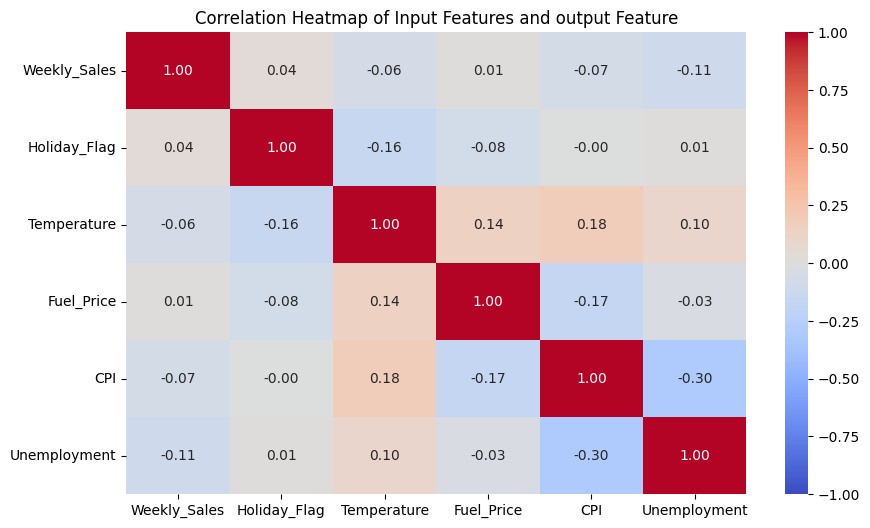

In [63]:
import seaborn as sns
totalInfo = data[inputFeatures + ['Unemployment']]

correlationMatrix = totalInfo.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlationMatrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Input Features and output Feature")
plt.show()
